In [2]:
# libraries!
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import seaborn as sns

# magic function to display images in the notebook
%matplotlib inline

In [3]:
def opencv_open_into_rgb( image_file_name ):
    """ open image_file_name and convert to rgb """
    image_raw = cv.imread(image_file_name, cv.IMREAD_COLOR)  # reads into BGR
    orig_num_rows, orig_num_cols, _ = image_raw.shape          # cool underscore variable!
    num_rows, num_cols, _ = image_raw.shape
    print(f"image with name {image_file_name} read with dimensions: {image_raw.shape}")
    
    # let's resize as long as any dimension is > 840...

    maxdim = max(num_rows,num_cols)
    while maxdim > 840:
        num_rows = num_rows//2  # halve!
        num_cols = num_cols//2  # halve!
        maxdim = max(num_rows,num_cols) # try again...
        
    if orig_num_rows != num_rows: # did we resize?
        print(f"resizing to rows, cols = {num_rows}, {num_cols}")
        image_raw = cv.resize(image_raw, dsize=(num_cols,num_rows), interpolation=cv.INTER_LINEAR)  # resizing
        
    # now, convert to rgb
    image_rgb = cv.cvtColor(image_raw, cv.COLOR_BGR2RGB)     # convert from BGR to RGB
    return image_rgb

image with name spam.jpg read with dimensions: (462, 616, 3)


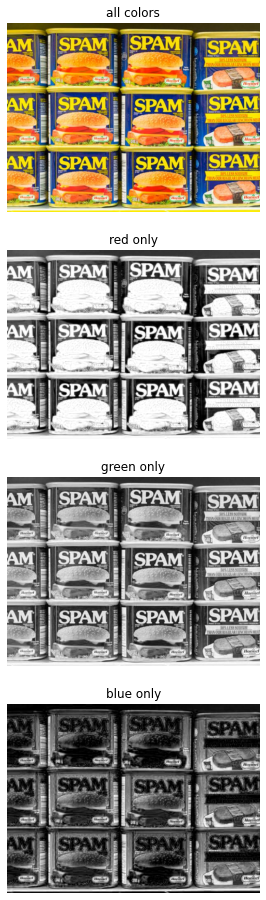

In [4]:
filename = "spam.jpg"  # "coffee.jpg"  "flag.png"  "avengers.jpg" ... try others

image_rgb = opencv_open_into_rgb(filename) 

fig, ax = plt.subplots(4,1, figsize=(6,16))  # this means ax will be a 1x4 numpy array of axes!

ax[0].imshow(image_rgb)                     # normal image
ax[0].axis('off')  
ax[0].set_title('all colors')  

ax[1].imshow(image_rgb[:,:,0],cmap="gray")  # red-channel image
ax[1].axis('off')  
ax[1].set_title('red only') 

ax[2].imshow(image_rgb[:,:,1],cmap="gray")  # green-channel image
ax[2].axis('off')  
ax[2].set_title('green only') 

ax[3].imshow(image_rgb[:,:,2],cmap="gray")  # blue-channel image
ax[3].axis('off')  
ax[3].set_title('blue only') 

plt.show()

In [5]:
def save_rgb_image( image_rgb, new_file_name ):
    """ saves the image  image_rgb  to the (string) name, new_file_name
        add the extension you'd like, png, jpg, ... it knows many (not all)
    """
    image_bgr = cv.cvtColor(image_rgb, cv.COLOR_RGB2BGR)     # convert from BGR to RGB
    result = cv.imwrite(new_file_name,image_bgr)
    if result == True:
        print(f"image_rgb was saved to {new_file_name}")
    else:
        print(f"there was a problem saving image_rgb to {new_file_name}")

In [6]:
filename = "spam.jpg"  # "coffee.jpg"  "flag.png"  "avengers.jpg" ... try others
image_rgb = opencv_open_into_rgb(filename) 
save_rgb_image( image_rgb, "new_image.png" )  # it needs the extension

image with name spam.jpg read with dimensions: (462, 616, 3)
image_rgb was saved to new_image.png


<br>

#### Now we'll try the facial recognition itself...

More info here:  
https://github.com/opencv/opencv/tree/master/data/haarcascades

https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades_cuda/haarcascade_profileface.xml


In [7]:
cascPath = "./haarcascade_frontalface_default.xml"
#cascPath = "./haarcascade_frontalface_alt_tree.xml"
#cascPath = "./haarcascade_frontalface_alt.xml"
#cascPath = "./haarcascade_profileface_newer.xml"

faceCascade = cv.CascadeClassifier(cascPath)

image with name disney.jpg read with dimensions: (900, 1600, 3)
resizing to rows, cols = 450, 800


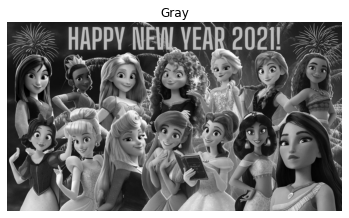

In [8]:
# Read the image
# image_faces_rgb = opencv_open_into_rgb("avengers.jpg")
image_faces_rgb = opencv_open_into_rgb("disney.jpg")
#image_faces_rgb = opencv_open_into_rgb("vanellope.jpg")

image_faces_gray = cv.cvtColor(image_faces_rgb, cv.COLOR_RGB2GRAY)

fig, ax = plt.subplots()
ax.imshow(image_faces_gray,cmap="gray")
ax.axis('off')  
ax.set_title('Gray') 
plt.show()

In [9]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    image_faces_gray,       # this is the input image
    scaleFactor=1.05,       # this is the scale-resolution for detecting faces
    minNeighbors=1,         # this is how many nearby-detections are needed to ok a face
    minSize=(10,10),        # this is the minimum size for a face
    flags = cv.CASCADE_SCALE_IMAGE,   # (standard)
)
print(f"Found {len(faces)} faces!")

for i, face in enumerate(faces):
    x,y,w,h = face
    print(f"face {i}: {face}")

Found 23 faces!
face 0: [478  86  61  61]
face 1: [313 181  48  48]
face 2: [363 106  55  55]
face 3: [ 42 107  65  65]
face 4: [237 293  53  53]
face 5: [283 255  58  58]
face 6: [151 262  54  54]
face 7: [593  96  56  56]
face 8: [707  83  70  70]
face 9: [567 239  61  61]
face 10: [ 20 108  59  59]
face 11: [452 232  75  75]
face 12: [150 114  51  51]
face 13: [ 55 248  60  60]
face 14: [240  73  76  76]
face 15: [527 165  70  70]
face 16: [ 16 132 106 106]
face 17: [631 241 106 106]
face 18: [255 105  64  64]
face 19: [377 246  61  61]
face 20: [700  57  66  66]
face 21: [150 300  62  62]
face 22: [335 266  89  89]


Drawn! How does it do?


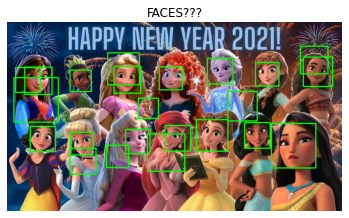

In [10]:
image_faces_drawn_rgb = image_faces_rgb.copy()  # copy onto which we draw the bounding boxes for the faces

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    # note that this draws on the color image!
    cv.rectangle(image_faces_drawn_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2) 

print(f"Drawn! How does it do?")

LoFi = []  # list of Face images

for (x, y, w, h) in faces:
    # note that this draws on the color image!
    face = image_faces_rgb[y:y+h,x:x+h,:]  #, (x, y), (x+w, y+h), (0, 255, 0), 2)  
    LoFi.append( face )

# show the image!
fig, ax = plt.subplots(figsize=(6,6)) 
ax.imshow(image_faces_drawn_rgb)
ax.axis('off')  
ax.set_title('FACES???') 
plt.show()

There are 23 faces detected - they are held in the list 'LoFi'
Here are some of them...


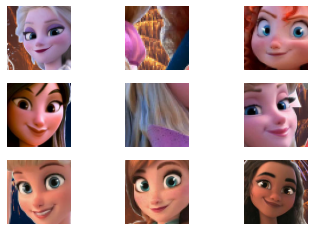

In [11]:
print(f"There are {len(LoFi)} faces detected - they are held in the list 'LoFi'")
print(f"Here are some of them...")
fig, ax = plt.subplots(3,3)  # this means ax will be a 3x3 numpy array of axes!
ax[0,0].imshow(LoFi[0])
ax[0,0].imshow(cv.resize(LoFi[0],dsize=(20,20)))
ax[0,0].imshow(LoFi[0])
ax[0,0].axis('off')  
ax[0,1].imshow(LoFi[1])
ax[0,1].axis('off')
ax[0,2].imshow(LoFi[2])
ax[0,2].axis('off')
ax[1,0].imshow(LoFi[3])
ax[1,0].axis('off')
ax[1,1].imshow(LoFi[4])
ax[1,1].axis('off')
ax[1,2].imshow(LoFi[5])
ax[1,2].axis('off')
ax[2,0].imshow(LoFi[6])
ax[2,0].axis('off')
ax[2,1].imshow(LoFi[7])
ax[2,1].axis('off')
ax[2,2].imshow(LoFi[8]) 
ax[2,2].axis('off')
plt.show()

Now, all of the faces are at the same, low resolution


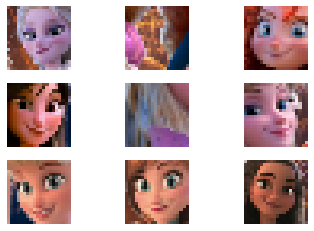

In [12]:
LoLoFi = [ cv.resize(LoFiIm,dsize=(20,20)) for LoFiIm in LoFi ]
print(f"Now, all of the faces are at the same, low resolution")
fig, ax = plt.subplots(3,3)  # this means ax will be a 3x3 numpy array of axes!
ax[0,0].imshow(LoFi[0])
ax[0,0].imshow(cv.resize(LoFi[0],dsize=(20,20)))
ax[0,0].imshow(LoLoFi[0])
ax[0,0].axis('off')  
ax[0,1].imshow(LoLoFi[1])
ax[0,1].axis('off')
ax[0,2].imshow(LoLoFi[2])
ax[0,2].axis('off')
ax[1,0].imshow(LoLoFi[3])
ax[1,0].axis('off')
ax[1,1].imshow(LoLoFi[4])
ax[1,1].axis('off')
ax[1,2].imshow(LoLoFi[5])
ax[1,2].axis('off')
ax[2,0].imshow(LoLoFi[6])
ax[2,0].axis('off')
ax[2,1].imshow(LoLoFi[7])
ax[2,1].axis('off')
ax[2,2].imshow(LoLoFi[8]) 
ax[2,2].axis('off')
plt.show()

In [13]:
A = np.zeros( (9,9) )
for r in range(9):
    for c in range(9):
        res = cv.matchTemplate(LoLoFi[r],LoLoFi[c],cv.TM_SQDIFF_NORMED)
        # res is a 2d image, so... we extract the value
        A[r,c] = res[0,0]
        
with np.printoptions(precision=3, suppress=True):  # suppress suppresses exponential notation!
    print(f"{A}")

[[0.    0.379 0.231 0.446 0.191 0.209 0.226 0.226 0.53 ]
 [0.379 0.    0.431 0.5   0.361 0.357 0.386 0.345 0.505]
 [0.231 0.431 0.    0.347 0.205 0.224 0.213 0.163 0.433]
 [0.446 0.5   0.347 0.    0.431 0.4   0.475 0.341 0.515]
 [0.191 0.361 0.205 0.431 0.    0.209 0.197 0.231 0.402]
 [0.209 0.357 0.224 0.4   0.209 0.    0.245 0.218 0.608]
 [0.226 0.386 0.213 0.475 0.197 0.245 0.    0.151 0.478]
 [0.226 0.345 0.163 0.341 0.231 0.218 0.151 0.    0.46 ]
 [0.53  0.505 0.433 0.515 0.402 0.608 0.478 0.46  0.   ]]


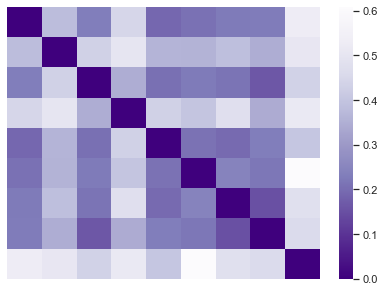

In [14]:
#
# show a heat map of correlations
#

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(A, cmap="Purples_r")   # Purple heatmap because why not
ax.axis('off')
# ALTERNATIVELY:  cmap="Gray", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

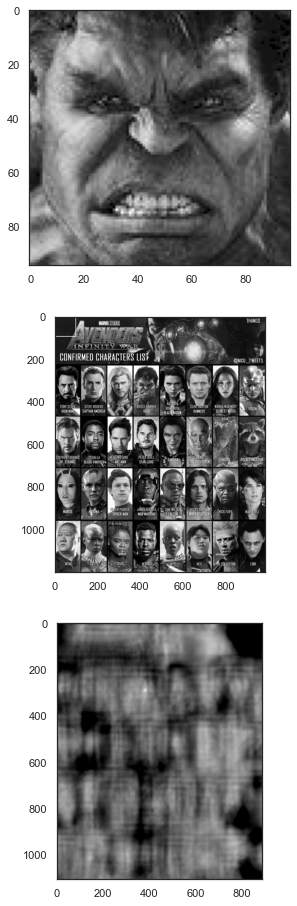

In [15]:
#
# example of template-matching, just to build intuition on it...  
# #  [Not needed later]
#

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('avengers.jpg',0) # the 0 input means "grayscale"
img2 = img.copy()
template = cv.imread('hulkface.png',0) # the 0 input means "grayscale"


w, h = template.shape[::-1]

# All the 6 methods available
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


if True:
    meth = 'cv.TM_SQDIFF_NORMED'
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in ['cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']:
        top_left = min_loc  # min for those comparisons
    else:
        top_left = max_loc  # otherwise take max
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    fig, ax = plt.subplots(3,1, figsize=(6,16))  # this means ax will be a 2x2 numpy array of axes!
    ax[0].imshow(template, cmap='gray')
    ax[1].imshow(img,cmap = 'gray')
    ax[2].imshow(1-res,cmap = 'gray')

### I want to see the world of basketball and soccer to cross paths... I want to see which NBA Player's face is the closest to Ronaldo's face...

### Technically, we are solving for "Which NBA Player is Ronaldo?" --> if Ronaldo decided to play basketball instead of soccer (based on appearances)

In [16]:
cascPath = "./haarcascade_frontalface_default.xml"
#cascPath = "./haarcascade_frontalface_alt_tree.xml"
#cascPath = "./haarcascade_frontalface_alt.xml"
#cascPath = "./haarcascade_profileface_newer.xml"

faceCascade = cv.CascadeClassifier(cascPath)

image with name basketball.jpg read with dimensions: (900, 1200, 3)
resizing to rows, cols = 450, 600


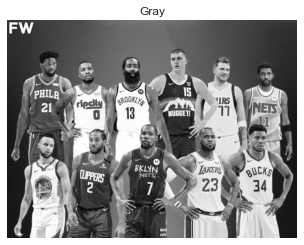

In [17]:
# Read the image
# image_faces_rgb = opencv_open_into_rgb("avengers.jpg")
image_faces_rgb1 = opencv_open_into_rgb("basketball.jpg")
#image_faces_rgb = opencv_open_into_rgb("vanellope.jpg")

image_faces_gray1 = cv.cvtColor(image_faces_rgb1, cv.COLOR_RGB2GRAY)

fig, ax = plt.subplots()
ax.imshow(image_faces_gray1,cmap="gray")
ax.axis('off')  
ax.set_title('Gray') 
plt.show()

In [18]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    image_faces_gray1,       # this is the input image
    scaleFactor=1.05,       # this is the scale-resolution for detecting faces
    minNeighbors=1,         # this is how many nearby-detections are needed to ok a face
    minSize=(10,10),        # this is the minimum size for a face
    flags = cv.CASCADE_SCALE_IMAGE,   # (standard)
)
print(f"Found {len(faces)} faces!")

for i, face in enumerate(faces):
    x,y,w,h = face
    print(f"face {i}: {face}")

Found 18 faces!
face 0: [333  68  34  34]
face 1: [520  99  34  34]
face 2: [433  90  34  34]
face 3: [ 47 367  77  77]
face 4: [ 68 245  35  35]
face 5: [129 362  82  82]
face 6: [162 235  35  35]
face 7: [146  87  39  39]
face 8: [400 225  40  40]
face 9: [362 214  32  32]
face 10: [268 217  44  44]
face 11: [504 228  40  40]
face 12: [547 305  51  51]
face 13: [75 79 32 32]
face 14: [479 238 106 106]
face 15: [239  80  41  41]
face 16: [148 212  82  82]
face 17: [462 132 129 129]


Drawn! How does it do?


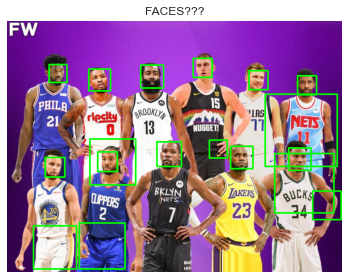

In [19]:
image_faces_drawn_rgb1 = image_faces_rgb1.copy()  # copy onto which we draw the bounding boxes for the faces

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    # note that this draws on the color image!
    cv.rectangle(image_faces_drawn_rgb1, (x, y), (x+w, y+h), (0, 255, 0), 2) 

print(f"Drawn! How does it do?")

LoFi1 = []  # list of Face images

for (x, y, w, h) in faces:
    # note that this draws on the color image!
    face = image_faces_rgb1[y:y+h,x:x+h,:]  #, (x, y), (x+w, y+h), (0, 255, 0), 2)  
    LoFi1.append( face )

# show the image!
fig, ax = plt.subplots(figsize=(6,6)) 
ax.imshow(image_faces_drawn_rgb1)
ax.axis('off')  
ax.set_title('FACES???') 
plt.show()

There are 18 faces detected - they are held in the list 'LoFi1'
Here are some of them...


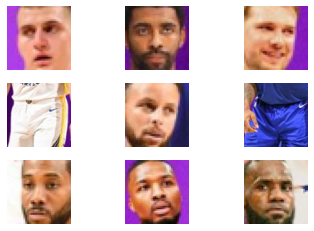

In [20]:
print(f"There are {len(LoFi1)} faces detected - they are held in the list 'LoFi1'")
print(f"Here are some of them...")
fig, ax = plt.subplots(3,3)  # this means ax will be a 3x3 numpy array of axes!
ax[0,0].imshow(LoFi1[0])
ax[0,0].imshow(cv.resize(LoFi[0],dsize=(20,20)))
ax[0,0].imshow(LoFi1[0])
ax[0,0].axis('off')  
ax[0,1].imshow(LoFi1[1])
ax[0,1].axis('off')
ax[0,2].imshow(LoFi1[2])
ax[0,2].axis('off')
ax[1,0].imshow(LoFi1[3])
ax[1,0].axis('off')
ax[1,1].imshow(LoFi1[4])
ax[1,1].axis('off')
ax[1,2].imshow(LoFi1[5])
ax[1,2].axis('off')
ax[2,0].imshow(LoFi1[6])
ax[2,0].axis('off')
ax[2,1].imshow(LoFi1[7])
ax[2,1].axis('off')
ax[2,2].imshow(LoFi1[8]) 
ax[2,2].axis('off')
plt.show()

Now, all of the faces are at the same, low resolution


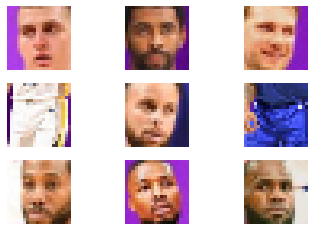

In [21]:
LoLoFi1 = [ cv.resize(LoFiIm,dsize=(20,20)) for LoFiIm in LoFi1 ]
print(f"Now, all of the faces are at the same, low resolution")
fig, ax = plt.subplots(3,3)  # this means ax will be a 3x3 numpy array of axes!
ax[0,0].imshow(LoFi1[0])
ax[0,0].imshow(cv.resize(LoFi1[0],dsize=(20,20)))
ax[0,0].imshow(LoLoFi1[0])
ax[0,0].axis('off')  
ax[0,1].imshow(LoLoFi1[1])
ax[0,1].axis('off')
ax[0,2].imshow(LoLoFi1[2])
ax[0,2].axis('off')
ax[1,0].imshow(LoLoFi1[3])
ax[1,0].axis('off')
ax[1,1].imshow(LoLoFi1[4])
ax[1,1].axis('off')
ax[1,2].imshow(LoLoFi1[5])
ax[1,2].axis('off')
ax[2,0].imshow(LoLoFi1[6])
ax[2,0].axis('off')
ax[2,1].imshow(LoLoFi1[7])
ax[2,1].axis('off')
ax[2,2].imshow(LoLoFi1[8]) 
ax[2,2].axis('off')
plt.show()

##### We have the basketball players' faces... Now we want Ronaldo's face!

image with name ronaldo.jpg read with dimensions: (416, 416, 3)


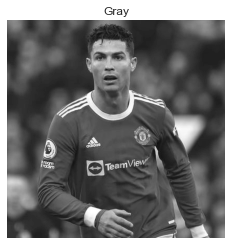

In [22]:
# Read the image
# image_faces_rgb = opencv_open_into_rgb("avengers.jpg")
image_faces_rgb2 = opencv_open_into_rgb("ronaldo.jpg")
#image_faces_rgb = opencv_open_into_rgb("vanellope.jpg")

image_faces_gray2 = cv.cvtColor(image_faces_rgb2, cv.COLOR_RGB2GRAY)

fig, ax = plt.subplots()
ax.imshow(image_faces_gray2,cmap="gray")
ax.axis('off')  
ax.set_title('Gray') 
plt.show()

In [23]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    image_faces_gray2,       # this is the input image
    scaleFactor=1.05,       # this is the scale-resolution for detecting faces
    minNeighbors=1,         # this is how many nearby-detections are needed to ok a face
    minSize=(10,10),        # this is the minimum size for a face
    flags = cv.CASCADE_SCALE_IMAGE,   # (standard)
)
print(f"Found {len(faces)} faces!")

for i, face in enumerate(faces):
    x,y,w,h = face
    print(f"face {i}: {face}")

Found 5 faces!
face 0: [241 210  28  28]
face 1: [21 54 57 57]
face 2: [ 46 228  55  55]
face 3: [240 309  92  92]
face 4: [143  31 103 103]


Drawn! How does it do?


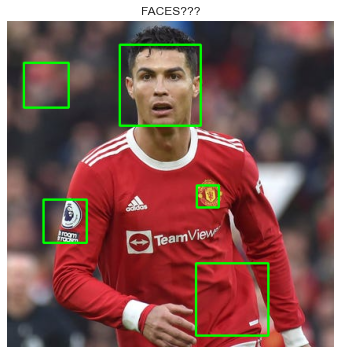

In [24]:
image_faces_drawn_rgb2 = image_faces_rgb2.copy()  # copy onto which we draw the bounding boxes for the faces

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    # note that this draws on the color image!
    cv.rectangle(image_faces_drawn_rgb2, (x, y), (x+w, y+h), (0, 255, 0), 2) 

print(f"Drawn! How does it do?")

LoFi2 = []  # list of Face images

for (x, y, w, h) in faces:
    # note that this draws on the color image!
    face = image_faces_rgb2[y:y+h,x:x+h,:]  #, (x, y), (x+w, y+h), (0, 255, 0), 2)  
    LoFi2.append( face )

# show the image!
fig, ax = plt.subplots(figsize=(6,6)) 
ax.imshow(image_faces_drawn_rgb2)
ax.axis('off')  
ax.set_title('FACES???') 
plt.show()

There are 5 faces detected - they are held in the list 'LoFi2'
Here are some of them...


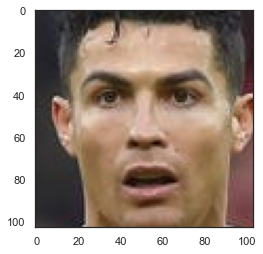

In [25]:
print(f"There are {len(LoFi2)} faces detected - they are held in the list 'LoFi2'")
print(f"Here are some of them...")
fig, ax = plt.subplots(1,1)  # this means ax will be a 1x1 numpy array of axes!
ax.imshow(LoFi2[4])          # Only want to show Ronaldo's Face!
plt.show()

Now, all of the faces are at the same, low resolution
althought it doesn't necessarily seem like the resolution changed at all....


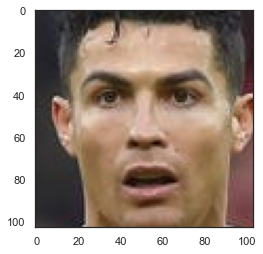

In [26]:
LoLoFi2 = [ cv.resize(LoFiIm,dsize=(20,20)) for LoFiIm in LoFi2 ]
print(f"Now, all of the faces are at the same, low resolution")
print("althought it doesn't necessarily seem like the resolution changed at all....")
fig, ax = plt.subplots(1,1)  # this means ax will be a 3x3 numpy array of axes!
ax.imshow(LoFi2[4])
plt.show()

# Doesn't necessarily seem like the resolution changed at all....

In [27]:
LoLoFi1.append(LoLoFi2[4])  # Add Ronaldo's Face to the Images of Basketball Player's Faces!
LoFi1.append(LoFi2[4])      # Add Ronaldo's Face to the Images of Basketball Player's Faces!

In [28]:
A = np.zeros( (19,19) )
for r in range(19):
    for c in range(19):
        res = cv.matchTemplate(LoLoFi1[r],LoLoFi1[c],cv.TM_SQDIFF_NORMED)
        # res is a 2d image, so... we extract the value
        A[r,c] = res[0,0]
        
with np.printoptions(precision=3, suppress=True):  # suppress suppresses exponential notation!
    print(f"{A}")




[[0.    0.438 0.182 0.236 0.274 0.699 0.171 0.191 0.236 0.699 0.219 0.205
  0.665 0.416 0.294 0.434 0.211 0.3   0.309]
 [0.438 0.    0.35  0.722 0.336 0.693 0.588 0.287 0.376 0.475 0.542 0.36
  0.386 0.127 0.54  0.273 0.625 0.499 0.199]
 [0.182 0.35  0.    0.242 0.1   0.642 0.202 0.173 0.284 0.77  0.204 0.19
  0.613 0.274 0.253 0.386 0.183 0.23  0.311]
 [0.236 0.722 0.242 0.    0.332 0.914 0.282 0.378 0.435 1.    0.338 0.392
  1.    0.656 0.293 0.714 0.305 0.341 0.501]
 [0.274 0.336 0.1   0.332 0.    0.689 0.243 0.24  0.362 0.81  0.233 0.299
  0.565 0.307 0.291 0.428 0.281 0.286 0.325]
 [0.699 0.693 0.642 0.914 0.689 0.    0.707 0.648 0.725 0.843 0.625 0.566
  0.587 0.573 0.666 0.697 0.681 0.593 0.666]
 [0.171 0.588 0.202 0.282 0.243 0.707 0.    0.291 0.425 0.902 0.098 0.343
  0.729 0.534 0.269 0.565 0.19  0.282 0.488]
 [0.191 0.287 0.173 0.378 0.24  0.648 0.291 0.    0.279 0.646 0.285 0.234
  0.592 0.256 0.332 0.229 0.307 0.349 0.275]
 [0.236 0.376 0.284 0.435 0.362 0.725 0.425 0.279 

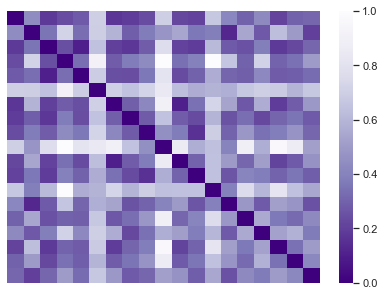

In [29]:
#
# show a heat map of correlations
#

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(A, cmap="Purples_r")   # Purple heatmap because why not
ax.axis('off')
# ALTERNATIVELY:  cmap="Gray", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [30]:
value = 0
img_num = 0
indexing = -1
for i in range(len(A)):
    if i == len(A)-1:
        for number in A[i]:
            indexing += 1
            if number > value:
                value = number
                img_num = indexing
print(f"Ronaldo has the lowest similarity in facial recognition with the NBA Player in the index {img_num}")
print(f"Their similarity score comes out to be {value}")
print()


Ronaldo has the highest similarity in facial recognition with the NBA Player in the index 5
Their similarity score comes out to be 0.6663995981216431



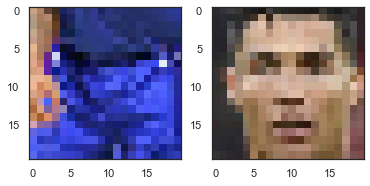

In [42]:
fig, ax = plt.subplots(1,2)  # this means ax will be a 1x2 numpy array of axes!
ax[0].imshow(LoLoFi1[5])
ax[1].imshow(LoLoFi1[-1])
plt.show()

# This is in Low Resolution!


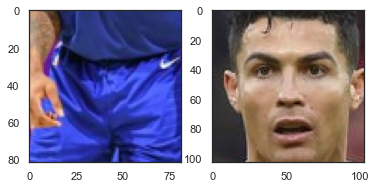

In [43]:
fig, ax = plt.subplots(1,2)  # this means ax will be a 1x2 numpy array of axes!
ax[0].imshow(LoFi1[5])
ax[1].imshow(LoFi1[-1])
plt.show()

# This is in High Resolution!

In [45]:
value = 0
img_num = 0
indexing = -1
for i in range(len(A)):
    if i == len(A)-1:
        for number in A[i]:
            indexing += 1
            if indexing != 5: 
                if number > value:
                    value = number
                    img_num = indexing
print(f"Ronaldo has the second lowest similarity in facial recognition with the NBA Player in the index {img_num}")
print(f"Their similarity score comes out to be {value}")
print()


Ronaldo has the secondest highest similarity in facial recognition with the NBA Player in the index 12
Their similarity score comes out to be 0.5461519956588745



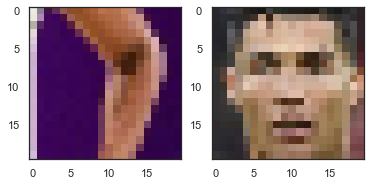

In [46]:
fig, ax = plt.subplots(1,2)  # this means ax will be a 1x2 numpy array of axes!
ax[0].imshow(LoLoFi1[12])
ax[1].imshow(LoLoFi1[-1])
plt.show()

# This is in Low Resolution!


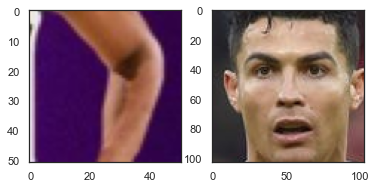

In [47]:
fig, ax = plt.subplots(1,2)  # this means ax will be a 1x2 numpy array of axes!
ax[0].imshow(LoFi1[12])
ax[1].imshow(LoFi1[-1])
plt.show()

# This is in High Resolution!

In [50]:
value = 99999
img_num = 0
indexing = -1
for i in range(len(A)):
    if i == len(A)-1:
        for number in A[i]:
            indexing += 1
            if indexing != 18:      # We don't want Ronaldo to be compared with Ronaldo...
                if number < value:
                    value = number
                    img_num = indexing
print(f"Ronaldo has the highest similarity in facial recognition with the NBA Player in the index {img_num}")
print(f"Their similarity score comes out to be {value}")
print()


Ronaldo has the highest similarity in facial recognition with the NBA Player in the index 1
Their similarity score comes out to be 0.19891226291656494



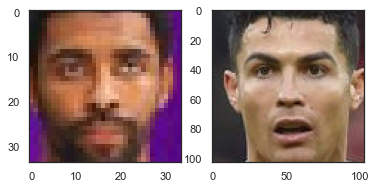

In [37]:
fig, ax = plt.subplots(1,2)  # this means ax will be a 1x2 numpy array of axes!
ax[0].imshow(LoFi1[1])
ax[1].imshow(LoFi1[-1])
plt.show()

# This is in High Resolution!

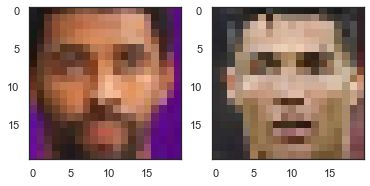

In [51]:
fig, ax = plt.subplots(1,2)  # this means ax will be a 1x2 numpy array of axes!
ax[0].imshow(LoLoFi1[1])
ax[1].imshow(LoLoFi1[-1])
plt.show()

# This is in Low Resolution!

In [52]:
value = 99999
img_num = 0
indexing = -1
for i in range(len(A)):
    if i == len(A)-1:
        for number in A[i]:
            indexing += 1
            if indexing != 18 and indexing != 1:
                if number < value:
                    value = number
                    img_num = indexing
print(f"Ronaldo has second the lowest highest in facial recognition with the NBA Player in the index {img_num}")
print(f"Their similarity score comes out to be {value}")
print()


Ronaldo has second the lowest highest in facial recognition with the NBA Player in the index 13
Their similarity score comes out to be 0.25304079055786133



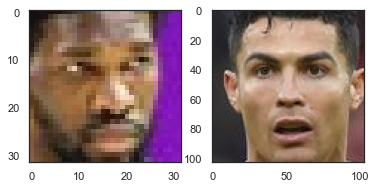

In [53]:
fig, ax = plt.subplots(1,2)  # this means ax will be a 1x2 numpy array of axes!
ax[0].imshow(LoFi1[13])
ax[1].imshow(LoFi1[-1])
plt.show()

# This is in High Resolution!

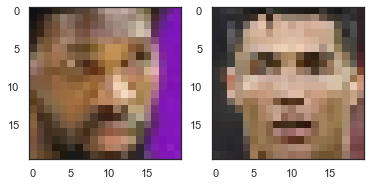

In [54]:
fig, ax = plt.subplots(1,2)  # this means ax will be a 1x2 numpy array of axes!
ax[0].imshow(LoLoFi1[13])
ax[1].imshow(LoLoFi1[-1])
plt.show()

# This is in High Resolution!